<a href="https://colab.research.google.com/github/shakeeluetp1041/Machine-Learning/blob/main/Recurrent_Neural_Network_Country_Name_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

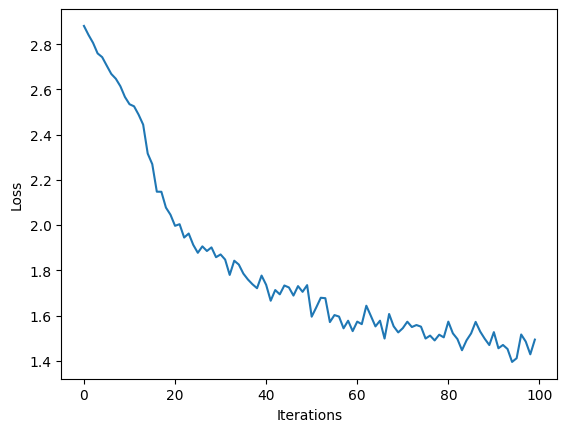

In [ ]:
# Connecting the googlecolab to gooledrive for accessing the data
from google.colab import drive
drive.mount('/content/drive')
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import unicodedata
import string
from pathlib import Path
import glob
import os

#Device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
# !nvidia-smi

all_letters = string.ascii_letters + " .,;'"# adding few more characters to the ascii
n_letters = len(all_letters)
# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s:string):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )
files=glob.glob(('/content/drive/MyDrive/data_names/names/*.txt'))
def findFiles(path:str):
  return glob.glob(path)
def readlines(filename):
  f=open(filename,'r')
  return f.read().strip().split('\n')

all_categories=[]
category_lines={}
for filename in findFiles('/content/drive/MyDrive/data_names/names/*.txt'):
  category=os.path.splitext(os.path.basename(filename))[0]
  all_categories.append(category)
  lines=readlines(filename)
  category_lines[category]=lines

n_categories=len(all_categories)
def random_example(category_lines:dict,all_categories:list):
  random_country_idx=torch.randint(0,len(all_categories),(1,))
  country_name=all_categories[random_country_idx]
  random_person_idx=torch.randint(0,len(category_lines[country_name]),(1,))
  person_name=category_lines[country_name][random_person_idx]
  return country_name,person_name

def letterToIndex(letter:str):
  return all_letters.find(letter)
def letterToTensor(letter:str):
  tensor=torch.zeros(1,n_letters)
  tensor[0][letterToIndex(letter)]=1
  return tensor

def lineToTensor(line):
  tensor=torch.zeros(len(line),n_letters)
  for i,letter in enumerate(line):
    tensor[i][letterToIndex(letter)]=1
  return tensor
lineToTensor('ab'),lineToTensor('ab')

def category_from_output(output,all_categories):
  category_idx=torch.argmax(output,dim=1)
  return all_categories[category_idx]

class RNN(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(RNN,self).__init__()
    self.hidden_size=hidden_size
    self.i2h=nn.Linear(input_size+hidden_size,hidden_size) # where is nonlinearity of hidden state
    self.i2o=nn.Linear(input_size+hidden_size,output_size)
    self.softmax=nn.LogSoftmax(dim=1)    # dim=1 is not clear, what is output at each stage?

  def forward(self,input_tensor,hidden_tensor):
    combined=torch.cat((input_tensor,hidden_tensor),dim=1)
    hidden_tensor=self.i2h(combined)
    output=self.i2o(combined)
    output=self.softmax(output)
    return output,hidden_tensor
hidden_size=128
torch.manual_seed(42)
model=RNN(input_size=n_letters,hidden_size=hidden_size,output_size=n_categories)
loss_fn=nn.NLLLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.005)
current_loss=0
all_losses=[]
plot_step,print_step=1000,5000
n_iter=100000 # No of iterations
model.train()
for i in  range(n_iter):
  hidden_tensor=torch.zeros(1,hidden_size)
  country_name,person_name=random_example(category_lines,all_categories)
  # category_tensor=torch.zeros(1,len(all_categories))
  # category_tensor[0][all_categories.index(country_name)]=1
  category_tensor= torch.tensor([all_categories.index(country_name)], dtype=torch.long)


  for j,letter in enumerate(person_name):
    input_tensor=lineToTensor(letter)
    output,hidden_tensor=model(input_tensor,hidden_tensor)
  loss=loss_fn(output,category_tensor) # Category tesnor?? where item to be used with output
  current_loss+=loss.item()
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (i+1)%plot_step==0:
      all_losses.append(current_loss/plot_step)
      current_loss=0
  if (i+1)%print_step==0:
    guess=category_from_output(output,all_categories)
    print(f'{guess},{country_name},{loss:.4f}')
plt.figure
plt.plot(all_losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.show()







In [ ]:
type(all_categories)
len(all_categories)
category_tensor=torch.zeros(1,len(all_categories))
category_tensor[0][all_categories.index('German')]=1
# category_tensor[0][15]=1
all_categories.index('Czech'),category_tensor,all_categories


(0,
 tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 ['Czech',
  'Portuguese',
  'German',
  'English',
  'Scottish',
  'Russian',
  'Korean',
  'Arabic',
  'Italian',
  'Vietnamese',
  'Greek',
  'Irish',
  'Chinese',
  'French',
  'Dutch',
  'Spanish',
  'Polish',
  'Japanese'])

In [ ]:
torch.max(torch.randint(0,18,(5000,)))


tensor(17)